# Supervised Classifiers
Classification models for assigning patients to clinics under a supervised setting

In [0]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy as sp
%matplotlib inline

from collections import Counter

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV

# Keras neural net imports
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers.convolutional import Convolution1D

# libraries for boosting
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

## Preprocess

In [0]:
# Load training and test sets in current working directory
x_train = pd.read_csv("x_train.csv").drop('Unnamed: 0', axis=1)
y_train = pd.read_csv("y_train.csv").drop('Unnamed: 0', axis=1).values.ravel()
x_test = pd.read_csv("x_test.csv").drop('Unnamed: 0', axis=1)
y_test = pd.read_csv("y_test.csv").drop('Unnamed: 0', axis=1).values.ravel()

In [0]:
f_x_train = pd.read_csv("filtered_x_train.csv").drop('Unnamed: 0', axis=1)
f_x_test = pd.read_csv("filtered_x_test.csv").drop('Unnamed: 0', axis=1)

In [0]:
import time
import math


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since):
    now = time.time()
    s = now - since
    return 'Time elapsed: %s (%s to %s)' % (asMinutes(s), asMinutes(since), asMinutes(now))

In [0]:
def scoreRMSE(predictor, X, true_y, plot = True):
    '''
    function to compute root mean squared error as well as prediction accuracy

    @args:
        predictor: model
        X: test input data
        true_y: true y labels for test data
        plot: only for boosting, plots f-scores for each booster
    '''
    predictions = predictor.predict(X)
    print("\nModel Report")
    print ("RMSE Score : %f" % np.sqrt(mean_squared_error(predictions, true_y)))
    accuracy = metrics.accuracy_score(predictions, true_y) * 100
    print("Accuracy : %.4g" % accuracy, '%')         

    if plot:
        # Print f-score:    
        feat_imp = pd.Series(predictor.get_booster().get_fscore()).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='f-score', figsize = (20, 10))
        plt.ylabel('f-score')

## Logistic Regressions

In [14]:
# Logistic Reg
print ("learning...")
logreg = LogisticRegressionCV(multi_class= "multinomial", solver= "lbfgs", cv=5,
                              max_iter = 10)
logreg.fit(x_train, y_train)
print("\nTraining Results")
scoreRMSE(logreg, x_train, y_train, plot = False)
print("\nEvaluation Results")
scoreRMSE(logreg, x_test, y_test, plot = False)
print ("done learning")

learning...


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase 


Training Results

Model Report
RMSE Score : 6.271508
Accuracy : 69.09 %

Evaluation Results

Model Report
RMSE Score : 9.293997
Accuracy : 43.24 %
done learning


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [13]:
# Logistic Reg using Elastic Net
print ("learning...")
elasticreg = LogisticRegressionCV(penalty='elasticnet', multi_class= "multinomial", 
                              solver= "saga", l1_ratios=[0.5], cv=5, max_iter = 10)
elasticreg.fit(x_train, y_train)
print("\nTraining Results")
scoreRMSE(elasticreg, x_train, y_train, plot = False)
print("\nEvaluation Results")
scoreRMSE(elasticreg, x_test, y_test, plot = False)
print ("done learning")

learning...


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_it


Training Results

Model Report
RMSE Score : 6.806080
Accuracy : 66.36 %

Evaluation Results

Model Report
RMSE Score : 9.709288
Accuracy : 40.54 %
done learning


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


## Bayes

In [15]:
# MNB
print ("learning...")
mnb = MultinomialNB(fit_prior = True)
mnb.fit(x_train, y_train)
scores = cross_val_score(mnb, x_train, y_train, cv=10)
print(scores)
print("Mean Accuracy: ", np.mean(scores))
print("\nTraining Results")
scoreRMSE(mnb, x_train, y_train, plot = False)
print("\nEvaluation Results")
scoreRMSE(mnb, x_test, y_test, plot = False)
print ("done learning")

learning...
[0.57894737 0.56756757 0.54545455 0.44827586 0.64       0.5
 0.42857143 0.45454545 0.875      0.71428571]
Mean Accuracy:  0.5752647940914728

Training Results

Model Report
RMSE Score : 7.180149
Accuracy : 60.91 %

Evaluation Results

Model Report
RMSE Score : 9.537267
Accuracy : 48.65 %
done learning


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


## SVC

In [16]:
# SVM
print ("learning...")
svc = SVC(class_weight='balanced')
svc.fit(x_train, y_train)
scores = cross_val_score(svc, x_train, y_train, cv=10)
print(scores)
print("Mean Accuracy: ", np.mean(scores))
print("\nTraining Results")
scoreRMSE(svc, x_train, y_train, plot = False)
print("\nEvaluation Results")
scoreRMSE(svc, x_test, y_test, plot = False)
print ("done learning")

learning...
[0.05263158 0.05405405 0.03030303 0.06896552 0.04       0.05555556
 0.07142857 0.09090909 0.125      0.14285714]
Mean Accuracy:  0.07317045412961928

Training Results

Model Report
RMSE Score : 2.779797
Accuracy : 92.27 %

Evaluation Results


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change f


Model Report
RMSE Score : 10.723175
Accuracy : 1.351 %
done learning


## kNN

In [51]:
# k Nearest Neighbors
print ("learning...")
knn = KNN(n_neighbors=8)
knn.fit(x_train, y_train)
scores = cross_val_score(knn, x_train, y_train, cv=10)
print(scores)
print("Mean Accuracy: ", np.mean(scores))
print("\nTraining Results")
scoreRMSE(knn, x_train, y_train, plot = False)
print("\nEvaluation Results")
scoreRMSE(knn, x_test, y_test, plot = False)
print ("done learning")

learning...
[0.52631579 0.56756757 0.57575758 0.51724138 0.6        0.66666667
 0.57142857 0.54545455 0.875      0.71428571]
Mean Accuracy:  0.615971780994467

Training Results

Model Report
RMSE Score : 5.710437
Accuracy : 71.82 %

Evaluation Results

Model Report
RMSE Score : 9.135615
Accuracy : 45.95 %
done learning


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


## Random Forest

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


# Number of trees in random forest
n_estimators = n_estimators = list(range(10, 100, 10))

# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = list(range(10, 30, 10))
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [20]:
print ("learning...")
rfc = RandomForestClassifier(min_samples_split=10)
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(x_train, y_train)
print(rf_random.best_params_) #{'bootstrap': True, 'max_features': 'sqrt', 'min_samples_split': 2, 'max_depth': 30, 'n_estimators': 300, 'min_samples_leaf': 2}
print("\nTraining Results")
scoreRMSE(rf_random, x_train, y_train, plot = False) 
print("\nEvaluation Results")
scoreRMSE(rf_random, x_test, y_test, plot = False)
print ("done learning")

learning...
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 342 tasks      | elapsed:   26.6s


{'n_estimators': 40, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}

Training Results

Model Report
RMSE Score : 3.573259
Accuracy : 88.64 %

Evaluation Results

Model Report
RMSE Score : 7.444388
Accuracy : 52.7 %
done learning


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   38.5s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [52]:
rf_random.fit(x_train, y_train)
scores = cross_val_score(rf_random, x_train, y_train, cv=10)
print(scores)
print("Mean Accuracy: ", np.mean(scores))
print ("done learning")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 342 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   38.6s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. T

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   35.9s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   35.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   36.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   36.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   36.9s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   37.1s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 342 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   37.4s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 342 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   38.0s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 342 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   37.9s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 342 tasks      | elapsed:   26.4s


[0.73684211 0.7027027  0.66666667 0.62068966 0.68       0.72222222
 0.57142857 0.63636364 0.875      0.85714286]
Mean Accuracy:  0.7069058416962227
done learning


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   38.0s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Neural Net

In [0]:
nn_train = np_utils.to_categorical(y_train)

def nn():
    model = Sequential()
    model.add(Dense(100, input_dim= x_train.shape[1], init = 'normal', activation = 'relu'))
    #model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    model.add(Dense(nn_train.shape[1], init='normal', activation = 'softmax'))
    model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics= ['accuracy'])
    return model

In [24]:
print ("learning...")
nnc = KerasClassifier(build_fn = nn, nb_epoch = 200, batch_size=5, verbose=0)
scores = cross_val_score(nnc, x_train, nn_train, cv=10)
print(scores)
print("Mean Accuracy: ", np.mean(scores))
print ("done learning")

learning...





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, input_dim=46, activation="relu", kernel_initializer="normal")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(31, activation="softmax", kernel_initializer="normal")`
  










[0.09090909 0.18181818 0.04545455 0.09090909 0.18181818 0.
 0.09090909 0.09090909 0.         0.        ]
Mean Accuracy:  0.07727272815325044
done learning


In [33]:
history = nnc.fit(x_train, nn_train, epochs= 150, batch_size = 32, validation_split = 0.2, verbose=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, input_dim=46, activation="relu", kernel_initializer="normal")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(31, activation="softmax", kernel_initializer="normal")`
  


Train on 176 samples, validate on 44 samples
Epoch 1/150
176/176 [==============================] - 1s 5ms/step - loss: 14.9401 - acc: 0.0682 - val_loss: 15.0191 - val_acc: 0.0682
Epoch 2/150
176/176 [==============================] - 0s 82us/step - loss: 14.8360 - acc: 0.0795 - val_loss: 15.0191 - val_acc: 0.0682
Epoch 3/150
176/176 [==============================] - 0s 82us/step - loss: 14.8360 - acc: 0.0795 - val_loss: 15.0191 - val_acc: 0.0682
Epoch 4/150
176/176 [==============================] - 0s 79us/step - loss: 14.8360 - acc: 0.0795 - val_loss: 15.0191 - val_acc: 0.0682
Epoch 5/150
176/176 [==============================] - 0s 73us/step - loss: 14.8360 - acc: 0.0795 - val_loss: 15.0191 - val_acc: 0.0682
Epoch 6/150
176/176 [==============================] - 0s 79us/step - loss: 14.8360 - acc: 0.0795 - val_loss: 15.0191 - val_acc: 0.0682
Epoch 7/150
176/176 [==============================] - 0s 66us/step - loss: 14.8360 - acc: 0.0795 - val_loss: 15.0191 - val_acc: 0.0682
Epoc

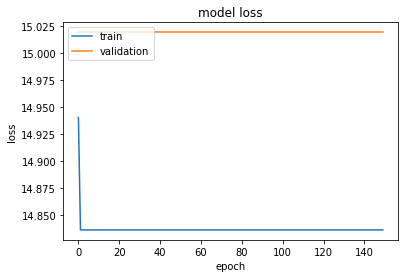

In [34]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [26]:
print("\nTraining Results")
scoreRMSE(nnc, x_train, nn_train, plot = False) 
print("\nEvaluation Results")
scoreRMSE(nnc, x_test, np_utils.to_categorical(y_test), plot = False)


Training Results


AttributeError: ignored

## Boosting

In [45]:
params = {'subsample': 0.6, 
          'n_estimators': 50, 
          'min_child_weight': 1, 
          'max_depth': 5, 
          'gamma': 0, 
          'colsample_bytree': 1.0, 
          'alpha': 0}
'''
{"objective":"multi:softmax", 
          "min_child_weight": 4, 
          'colsample_bytree': 0.8,
          'subsample': 0.8,
          'learning_rate': 0.1,
          'n_estimators': 200,
          'max_depth': 5, 
          'gamma': 0.2,       
          'alpha': 0,
          'scale_pos_weight': 1,
          'nthread' : 4,
          'random_state': 123
         }
'''
         

'\n{"objective":"multi:softmax", \n          "min_child_weight": 4, \n          \'colsample_bytree\': 0.8,\n          \'subsample\': 0.8,\n          \'learning_rate\': 0.1,\n          \'n_estimators\': 200,\n          \'max_depth\': 5, \n          \'gamma\': 0.2,       \n          \'alpha\': 0,\n          \'scale_pos_weight\': 1,\n          \'nthread\' : 4,\n          \'random_state\': 123\n         }\n'

In [46]:
xgb = XGBClassifier(**params)

print ("learning...")
xgb.fit(x_train, y_train, eval_metric = 'merror')
scores = cross_val_score(xgb, x_train, y_train, cv=10)
print(scores)
print("Mean Accuracy: ", np.mean(scores))
print ("done learning")

learning...


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[0.63157895 0.64864865 0.51515152 0.51724138 0.72       0.61111111
 0.57142857 0.63636364 0.875      0.85714286]
Mean Accuracy:  0.6583666666525105
done learning


In [0]:
# tuning grid
param_grid = {
          "min_child_weight": [1, 2, 3, 4, 5], 
          'colsample_bytree': [0.8, 1.0],
          'subsample': [0.6, 0.8],
          #'learning_rate': 0.1,
          'n_estimators': [50, 100, 150, 200],
          'max_depth': [3,5,7], 
          'gamma': [0, 0.2],       
          'alpha': [0, 0.2],
          #'scale_pos_weight': 1,
          #'nthread' : 4,
          #'random_state': 123
         }

In [42]:
# random search
xgb_random = RandomizedSearchCV(estimator = XGBClassifier(**params), param_distributions = param_grid, cv = 5, verbose = 2, random_state = 1022, n_jobs = -1)
print ("learning...")
xgb_random.fit(x_train, y_train)
print(xgb_random.best_params_) 
scores = cross_val_score(xgb_random, x_train, y_train, cv=10)
print(scores)
print("Mean Accuracy: ", np.mean(scores))
print ("done learning")

learning...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'subsample': 0.6, 'n_estimators': 50, 'min_child_weight': 1, 'max_depth': 5, 'gamma': 0, 'colsample_bytree': 1.0, 'alpha': 0}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   53.6s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   53.3s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   54.8s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   55.0s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   55.8s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   57.3s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   58.4s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   58.6s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   59.5s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   59.5s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[0.68421053 0.62162162 0.54545455 0.51724138 0.68       0.55555556
 0.64285714 0.54545455 0.875      0.85714286]
Mean Accuracy:  0.6524538173712402
done learning


In [54]:
print("\nTraining Results")
scoreRMSE(xgb_random, x_train, y_train, plot = False) 
print("\nEvaluation Results")
scoreRMSE(xgb_random, x_test, y_test, plot = False)


Training Results

Model Report
RMSE Score : 3.334394
Accuracy : 90.45 %

Evaluation Results

Model Report
RMSE Score : 8.291969
Accuracy : 48.65 %



Training Results

Model Report
RMSE Score : 3.500649
Accuracy : 90.45 %

Evaluation Results


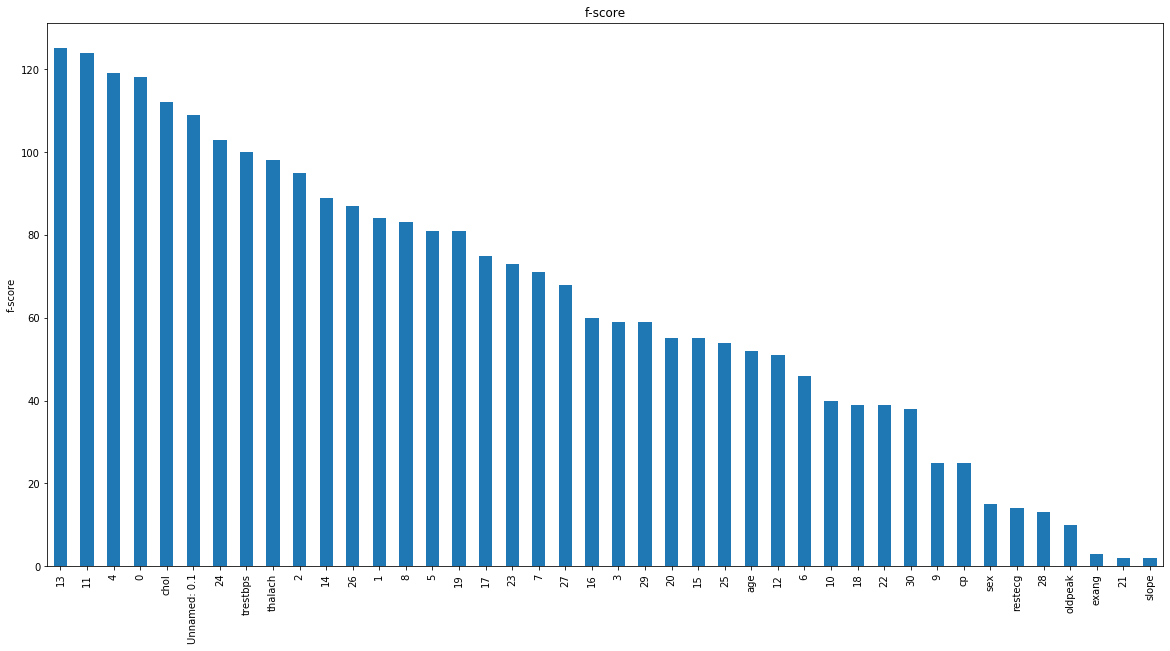

In [57]:
print("\nTraining Results")
scoreRMSE(xgb, x_train, y_train, plot = True) 


Evaluation Results

Model Report
RMSE Score : 8.124038
Accuracy : 44.59 %


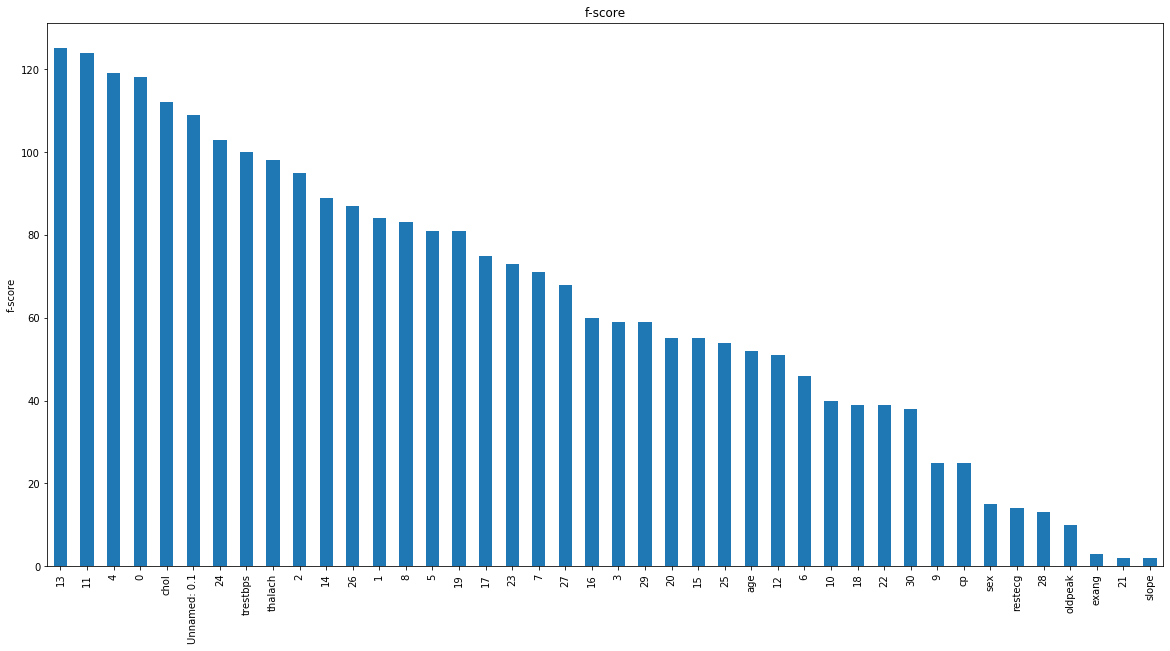

In [59]:
print("\nEvaluation Results")
scoreRMSE(xgb, x_test, y_test, plot = True)